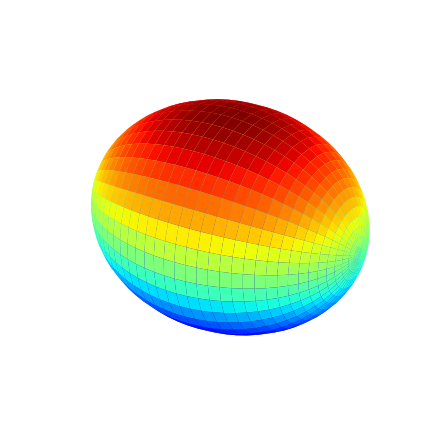

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import sys
import math
from matplotlib import gridspec

fig = plt.figure(figsize=(6,6))  # Square figure
gs = gridspec.GridSpec(12,12)
ax = fig.add_subplot(gs[0:12,0:12],projection='3d')
plt.subplots_adjust(left=0.0,right=1,top=1,bottom=0.0)

# Aspect ratio solution from https://stackoverflow.com/a/31364297
def set_axes_equal(ax):
	'''Make axes of 3D plot have equal scale so that spheres appear as spheres,
	cubes as cubes, etc..  This is one possible solution to Matplotlib's
	ax.set_aspect('equal') and ax.axis('equal') not working for 3D.

	Input
	  ax: a matplotlib axis, e.g., as output from plt.gca().
	'''

	x_limits = ax.get_xlim3d()
	y_limits = ax.get_ylim3d()
	z_limits = ax.get_zlim3d()

	x_range = abs(x_limits[1] - x_limits[0])
	x_middle = np.mean(x_limits)
	y_range = abs(y_limits[1] - y_limits[0])
	y_middle = np.mean(y_limits)
	z_range = abs(z_limits[1] - z_limits[0])
	z_middle = np.mean(z_limits)

	# The plot bounding box is a sphere in the sense of the infinity
	# norm, hence I call half the max range the plot radius.
	plot_radius = 0.5*max([x_range, y_range, z_range])

	ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
	ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
	ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

# Based on https://stackoverflow.com/a/7820701
def surface(b, g):

	r0 = 1
	
	xx = float(r0) * (1 + 5./(4 * math.pi) * float(b) * math.cos(math.radians(float(g)) - (2./3.) * math.pi * 1)) 
	yy = float(r0) * (1 + 5./(4 * math.pi) * float(b) * math.cos(math.radians(float(g)) - (2./3.) * math.pi * 2))
	zz = float(r0) * (1 + 5./(4 * math.pi) * float(b) * math.cos(math.radians(float(g)) - (2./3.) * math.pi * 3))

	coefs = (1/(xx*xx), 1/(yy*yy), 1/(zz*zz))  # Coefficients in a0/c x**2 + a1/c y**2 + a2/c z**2 = 1 
	# Radii corresponding to the coefficients:
	rx, ry, rz = 1/np.sqrt(coefs)

	# Set of all spherical angles:
	u = np.linspace(0, 2 * np.pi, 40)
	v = np.linspace(0, np.pi, 40)

	# Cartesian coordinates that correspond to the spherical angles:
	# (this is the equation of an ellipsoid):
	x = rx * np.outer(np.cos(u), np.sin(v))
	y = ry * np.outer(np.sin(u), np.sin(v))
	z = rz * np.outer(1, np.cos(v))
	
	# Plot:
	#ax.cla()	# clears axis - useful for looping
	ax.axis('off') 	# comment to show axes
	ax.margins(0)
	# 	z,x,y ordering improves clarity
	#	change cmap to change colours
	ax.plot_surface(z,x,y,rstride=1,cstride=1,cmap='jet')
	ax.xaxis.set_ticklabels([])
	ax.yaxis.set_ticklabels([])
	ax.zaxis.set_ticklabels([])
	max_radius = 0.8*max(rx, ry, rz)
	for axis in 'xyz':
		getattr(ax, 'set_{}lim'.format(axis))((-max_radius, max_radius))

beta = 0.4
gamma = 0	# degrees

surface(beta,gamma)

set_axes_equal(ax)

plt.show()
	

